In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as p
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy.spatial import distance
from scipy.stats.mstats import gmean
from sklearn.linear_model import LinearRegression
%matplotlib inline
from itertools import combinations
from itertools import chain
import sys
import os
import copy
sns.set_style('white')
sns.set_style('ticks')
sns.set_color_codes()

fgm_simulation_path = '/Users/grantkinsler/Documents/Stanford/Research/StarryNight/Git/starry-night/Simulations/FGM_simulation_callable.py'
sys.path.append(os.path.dirname(os.path.expanduser(fgm_simulation_path)))
from FGM_simulation_callable import simulation, nball_pull, gaussian_fitness

tools_path = '../code/tools.py'
sys.path.append(os.path.dirname(os.path.expanduser(tools_path)))
import tools
from tools import mutant_colorset

In [2]:
np.random.seed(953527608) # for exact figure reproducibility use this seed
# np.random.seed(None)

In [3]:
fitness_data = p.read_csv('../data/DoubleBC_Merged_Fitness_Atish_Default_AllConditions.csv')

In [4]:
old_conditions = {
                  '3':['3.1','3.2','3.3'],
                  '6':['6.1','6.2','6.3'],
                  '13':['13.1','13.2','13.3'],
                  '18':['18.1','18.2','18.3'],
                  '20':['20.1','20.2','20.3'],
                  '21':['21.1','21.2','21.3'],
                  '23':['23.1','23.2','23.3']
                 }

bigbatch_conditions = {
                        '1BB_M3':['A','B','C','D'],
                        '1BB_Baffle':['E','F'],
                        '1BB_1.4%Gluc' :['G','H'],
                        '1BB_1.8%Gluc' :['I','J'],
                        '1BB_0.2MNaCl' :['K','L'],
                        '1BB_0.2MKCl' :['O'],
                        '1BB_0.5MKCl' :['P'],
#                         '1BB_8.5uMGdA' :['Q','R'],
#                         '1BB_17uMGdA' :['S','T'],
#                         '1BB_2ugFlu' :['U','V'],
#                         '1BB_0.5ugFlu' :['W','X'],
                        '1BB_0.2MNaCl' :['Y','Z'],
                        '1BB_0.5%Raf' :['AA','BB'],
                        '1BB_1%Gly' :['CC','DD'],
#                         '1BB_1%EtOH' :['EE','FF'],
#                         '1BB_SucRaf' :['GG'],
                      }


# m3_conditions = {**old_conditions,}
conditions = {**old_conditions, **bigbatch_conditions}
all_conditions = conditions.keys()
all_reps = [rep for reps in conditions.values() for rep in reps]

m3_conditions = list(old_conditions.keys()) + ['1BB_M3']
m3_reps = [rep for condition in m3_conditions for rep in conditions[condition]]



In [30]:
this_data = fitness_data
this_data = this_data.replace([np.inf, -np.inf], np.nan)
this_data = this_data.dropna()

this_data = this_data.sort_values('barcode')

n_folds = 2
n_mutants_final = len(this_data.index) - len(this_data.index)%n_folds

drop_indices = np.random.choice(this_data.index, len(this_data.index)-n_mutants_final, replace=False)

this_data = this_data.drop(drop_indices)

# fitness = this_data[[col+'_fitness' for col in all_conditions]].values
# error = this_data[[col+'_error' for col in all_conditions]].values

fitness = this_data[[col+'_fitness' for col in all_reps]].values
error = this_data[[col+'_error' for col in all_reps]].values
# 
n_mutants = fitness.shape[0]
n_conditions = fitness.shape[1]

In [31]:
fitness_cols = np.asarray([col for col in all_reps])

m3_rep_indices = np.where(np.isin(fitness_cols,m3_reps))[0]
other_rep_indices = np.where(~np.isin(fitness_cols,m3_reps))[0]

In [32]:
n_mutants

146

In [34]:
n_mutant_sets = 10000
n_mutants_w_batches = 20

In [35]:

mutant_list = []
other_fit_list = []
m3_fit_list = []




for t in range(n_mutant_sets):
    condition_folds = [other_rep_indices,m3_rep_indices]
    fold_names = ['M3 Predict Other','Other Predict M3']
    n_folds = 2 
    mutant_permutation = np.random.permutation(n_mutants)
    mutant_folds = [sorted(mutant_permutation[:n_mutants_w_batches]),
                    sorted(mutant_permutation[n_mutants_w_batches:])       
                   ]
    
    mutant_list.append(sorted(mutant_permutation[:n_mutants_w_batches]))
    folds = [(mutant_folds[i],condition_folds[i]) for i in range(2)]
    
    all_fold, by_fold, by_condition = tools.SVD_predictions(fitness,folds,fitness.shape[0],fitness.shape[1],2)
    
    other_fit_list.append(by_fold[0])
    m3_fit_list.append(by_fold[1])

In [17]:
other_fit_list

[[0.6838868125194516,
  0.7965479920528344,
  0.790228071653568,
  0.7987903353884386,
  0.8258133717863438,
  0.8528757599958456,
  0.8689281997104524,
  0.8678865944662801,
  0.8667689312465764,
  0.871956006894408,
  0.8710988851772006,
  0.8685653430133055,
  0.868180379236331,
  0.8735396046823948,
  0.8645872074347402,
  0.8575768965675956,
  0.8775366560638964,
  0.8809665784668637,
  0.8820199859885866],
 [0.7319099269327809,
  0.7903878395593913,
  0.7925752811544999,
  0.8099779592838197,
  0.8251775506275477,
  0.9048896696658325,
  0.9082299406212512,
  0.9086083175871156,
  0.9098869391304598,
  0.9117469685287445,
  0.9121309222025263,
  0.9130890869993379,
  0.9133455603690712,
  0.9218882531009517,
  0.9233349256977882,
  0.9295079012205174,
  0.9309359838737254,
  0.9289292724605065,
  0.9283762446168801],
 [0.7129218004154803,
  0.7250335434448977,
  0.7208220934792204,
  0.7337112640316287,
  0.7728853615571476,
  0.8412802414115697,
  0.8632593281944692,
  0.8685129

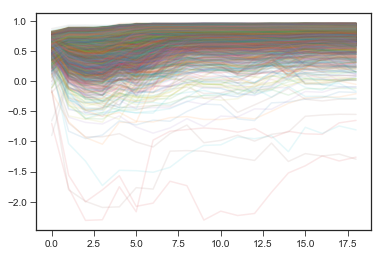

In [36]:
for s in range(len(other_fit_list)):
    plt.plot(other_fit_list[s],alpha=0.1)

In [44]:
np.asarray(other_fit_list).shape

(10000, 19)

In [48]:
np.max(other_fit_list)

0.9694793486665392

In [38]:
np.where(other_fit_list==np.max(other_fit_list))

(array([2158]), array([17]))

In [47]:
np.max(m3_fit_list)

0.9104831868651295

In [46]:
np.where(m3_fit_list==np.max(m3_fit_list))

(array([1307]), array([3]))

In [51]:
mutant_list[1307]

[11,
 14,
 19,
 24,
 27,
 28,
 31,
 44,
 45,
 46,
 53,
 54,
 56,
 87,
 92,
 97,
 100,
 104,
 110,
 128]

In [50]:
this_data[this_data.index.isin(mutant_list[1307])]

,13.1_error,13.1_fitness,13.2_error,13.2_fitness,13.3_error,13.3_fitness,18.1_error,18.1_fitness,18.2_error,18.2_fitness,...,1BB_0.2MNaCl_fitness,1BB_0.2MNaCl_error,1BB_0.2MKCl_fitness,1BB_0.2MKCl_error,1BB_0.5MKCl_fitness,1BB_0.5MKCl_error,1BB_0.5%Raf_fitness,1BB_0.5%Raf_error,1BB_1%Gly_fitness,1BB_1%Gly_error
24,0.059451,1.068635,0.059437,1.107614,0.059703,0.847157,0.071528,0.774428,0.071665,0.904892,...,0.578845,0.051395,0.440994,0.052098,-0.374452,0.066600,0.622411,0.018493,0.673507,0.025561
28,0.078641,0.292613,0.075804,0.347480,0.080282,0.198054,0.082208,0.308876,0.093080,0.395697,...,0.099744,0.062815,0.512177,0.055119,0.261540,0.060534,0.257494,0.025152,0.355492,0.031820
44,0.061012,0.849619,0.060690,0.870154,0.062281,0.413337,0.072214,0.762121,0.073079,0.736353,...,0.818720,0.051768,-0.069296,0.063253,-3.704573,0.278954,0.801647,0.018938,0.702730,0.026567
56,0.065358,0.705831,0.063670,0.763275,0.068842,0.387512,0.074068,0.609607,0.076826,0.712858,...,0.111946,0.082087,-0.023750,0.101835,-0.029139,0.095940,-0.032549,0.036900,-0.109701,0.058160
97,0.060167,1.397258,0.060139,1.335087,0.061484,1.058660,0.072045,1.029797,0.072568,1.122006,...,0.056687,0.065841,0.017494,0.073963,0.003613,0.073073,-0.002650,0.029743,-0.001053,0.041770


In [54]:
this_data[this_data['barcode'].isin(this_data['barcode'].values[mutant_list[1307]])]

,13.1_error,13.1_fitness,13.2_error,13.2_fitness,13.3_error,13.3_fitness,18.1_error,18.1_fitness,18.2_error,18.2_fitness,...,1BB_0.2MNaCl_fitness,1BB_0.2MNaCl_error,1BB_0.2MKCl_fitness,1BB_0.2MKCl_error,1BB_0.5MKCl_fitness,1BB_0.5MKCl_error,1BB_0.5%Raf_fitness,1BB_0.5%Raf_error,1BB_1%Gly_fitness,1BB_1%Gly_error
20,0.064041,0.764996,0.062675,0.721812,0.065912,0.447791,0.073510,0.792469,0.074992,0.797015,...,0.009826,0.066973,0.154848,0.070854,-0.734555,0.117718,0.115621,0.029432,0.387046,0.035842
23,0.068438,0.566557,0.066381,0.590361,0.069145,0.307617,0.074078,0.593297,0.078261,0.578311,...,0.532282,0.053537,0.380507,0.053874,-0.076102,0.063575,0.483801,0.021036,0.345821,0.029014
36,0.059342,1.271395,0.059340,1.194536,0.059510,1.037320,0.071419,1.120747,0.071474,1.270421,...,0.895329,0.051542,-0.109547,0.066256,-3.349623,0.431280,0.730906,0.018503,0.977312,0.025277
44,0.061012,0.849619,0.060690,0.870154,0.062281,0.413337,0.072214,0.762121,0.073079,0.736353,...,0.818720,0.051768,-0.069296,0.063253,-3.704573,0.278954,0.801647,0.018938,0.702730,0.026567
52,0.062385,0.834018,0.061687,0.845238,0.064084,0.499147,0.072898,0.774950,0.074536,0.710367,...,0.722634,0.051672,0.360613,0.052329,-1.571232,0.097834,0.685227,0.018664,0.646892,0.025634
56,0.065358,0.705831,0.063670,0.763275,0.068842,0.387512,0.074068,0.609607,0.076826,0.712858,...,0.111946,0.082087,-0.023750,0.101835,-0.029139,0.095940,-0.032549,0.036900,-0.109701,0.058160
61,0.059454,1.349237,0.059466,1.311231,0.059826,1.052103,0.071579,0.947615,0.071760,1.084748,...,0.992399,0.050721,-0.674033,0.075802,-3.459168,0.325550,0.923387,0.017801,0.983801,0.025084
96,0.059586,1.314938,0.059658,1.210939,0.060175,1.032862,0.071679,0.932070,0.071931,1.080126,...,0.938974,0.050746,-0.594720,0.073793,-2.915921,0.305166,0.917503,0.017796,0.946625,0.025040
97,0.060167,1.397258,0.060139,1.335087,0.061484,1.058660,0.072045,1.029797,0.072568,1.122006,...,0.056687,0.065841,0.017494,0.073963,0.003613,0.073073,-0.002650,0.029743,-0.001053,0.041770
101,0.059620,1.050702,0.059592,1.038743,0.060032,0.729786,0.071629,0.784118,0.071848,0.870209,...,0.679100,0.051462,0.460289,0.052170,-0.348765,0.066819,0.703029,0.018498,0.680169,0.025643


KeyboardInterrupt: 

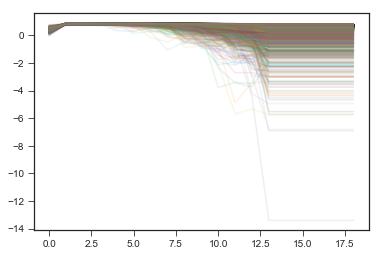

In [37]:
for s in range(len(other_fit_list)):
    plt.plot(m3_fit_list[s],alpha=0.1)
plt.ylim(0.5,1)